In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('/content/week 4 - Nashville_housing_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Parcel ID', 'Land Use', 'Property Address',
       'Suite/ Condo   #', 'Property City', 'Sale Date', 'Legal Reference',
       'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'City', 'State',
       'Acreage', 'Tax District', 'Neighborhood', 'Land Value',
       'Building Value', 'Finished Area', 'Foundation Type', 'Year Built',
       'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath',
       'Sale Price Compared To Value'],
      dtype='object')

# Cleaning the Dataset

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.rename(columns={'Suite/ Condo   #': 'suite_condo_number'}, inplace=True)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
print(df.isnull().sum())

Parcel ID                                0
Land Use                                 0
Property Address                         2
suite_condo_number                   22610
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath                                1
Half Bath  

In [7]:
df.drop(columns=['suite_condo_number'], inplace=True)
df.dropna(inplace=True)

In [8]:
df.columns

Index(['Parcel ID', 'Land Use', 'Property Address', 'Property City',
       'Sale Date', 'Legal Reference', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'City', 'State', 'Acreage',
       'Tax District', 'Neighborhood', 'Land Value', 'Building Value',
       'Finished Area', 'Foundation Type', 'Year Built', 'Exterior Wall',
       'Grade', 'Bedrooms', 'Full Bath', 'Half Bath',
       'Sale Price Compared To Value'],
      dtype='object')

In [9]:
df.head()

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,City,State,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,1/11/2013,20130118-0006337,No,No,NASHVILLE,TN,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,1/18/2013,20130124-0008033,No,No,NASHVILLE,TN,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,1/18/2013,20130128-0008863,No,No,NASHVILLE,TN,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,1/23/2013,20130131-0009929,No,No,NASHVILLE,TN,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NASHVILLE,1/4/2013,20130118-0006110,No,No,NASHVILLE,TN,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [10]:
df.drop(columns=['Parcel ID' ,
                'Legal Reference',
                 'Property City',
                 'State',
                 'Tax District',
                 'Property Address'],
        inplace=True)
df.drop(['City'],axis=1)

,Land Use,Sale Date,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,SINGLE FAMILY,1/11/2013,No,No,0.17,3127,32000,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,SINGLE FAMILY,1/18/2013,No,No,0.11,9126,34000,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,SINGLE FAMILY,1/18/2013,No,No,0.17,3130,25000,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,SINGLE FAMILY,1/23/2013,No,No,0.34,3130,25000,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,SINGLE FAMILY,1/4/2013,No,No,0.17,3130,25000,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,SINGLE FAMILY,10/13/2016,No,No,0.38,6328,25000,105000,1758.00000,CRAWL,1996,BRICK/FRAME,C,3.0,2.0,0.0,Over
22647,SINGLE FAMILY,10/26/2016,No,No,0.27,6328,25000,142400,2421.00000,SLAB,1996,BRICK/FRAME,C,3.0,3.0,0.0,Over
22648,SINGLE FAMILY,10/28/2016,No,No,0.23,6328,25000,159300,3117.00000,SLAB,1995,BRICK/FRAME,C,3.0,3.0,0.0,Over
22649,SINGLE FAMILY,10/28/2016,No,No,0.15,126,40000,204100,1637.00000,CRAWL,2004,FRAME,B,3.0,2.0,1.0,Over


In [11]:
df.drop(['City'],axis=1,inplace=True)

In [12]:
df.head()

,Land Use,Sale Date,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,SINGLE FAMILY,1/11/2013,No,No,0.17,3127,32000,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,SINGLE FAMILY,1/18/2013,No,No,0.11,9126,34000,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,SINGLE FAMILY,1/18/2013,No,No,0.17,3130,25000,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,SINGLE FAMILY,1/23/2013,No,No,0.34,3130,25000,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,SINGLE FAMILY,1/4/2013,No,No,0.17,3130,25000,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


Making age columns of house by

Year built - sale date

In [13]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'], errors='coerce')

# Extract the year from 'Sale Date' column
df['sale_year'] = df['Sale Date'].dt.year
df['age_years'] = df['sale_year'] - df['Year Built']
df.drop(columns=['Sale Date', 'Year Built', 'sale_year'], inplace=True)

In [14]:
df.head()

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Foundation Type,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,age_years
0,SINGLE FAMILY,No,No,0.17,3127,32000,134400,1149.00000,PT BSMT,BRICK,C,2.0,1.0,0.0,Over,72
1,SINGLE FAMILY,No,No,0.11,9126,34000,157800,2090.82495,SLAB,BRICK/FRAME,C,3.0,2.0,1.0,Over,13
2,SINGLE FAMILY,No,No,0.17,3130,25000,243700,2145.60001,FULL BSMT,BRICK/FRAME,B,4.0,2.0,0.0,Under,65
3,SINGLE FAMILY,No,No,0.34,3130,25000,138100,1969.00000,CRAWL,FRAME,C,2.0,1.0,0.0,Under,103
4,SINGLE FAMILY,No,No,0.17,3130,25000,86100,1037.00000,CRAWL,FRAME,C,2.0,1.0,0.0,Under,68


In [15]:
df['Sold As Vacant'] = df['Sold As Vacant'].map({'Yes': 1, 'No': 0})
df['Multiple Parcels Involved in Sale'] = df['Multiple Parcels Involved in Sale'].map({'Yes': 1, 'No': 0})
df.head(10)

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Foundation Type,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,age_years
0,SINGLE FAMILY,0,0,0.17,3127,32000,134400,1149.00000,PT BSMT,BRICK,C,2.0,1.0,0.0,Over,72
1,SINGLE FAMILY,0,0,0.11,9126,34000,157800,2090.82495,SLAB,BRICK/FRAME,C,3.0,2.0,1.0,Over,13
2,SINGLE FAMILY,0,0,0.17,3130,25000,243700,2145.60001,FULL BSMT,BRICK/FRAME,B,4.0,2.0,0.0,Under,65
3,SINGLE FAMILY,0,0,0.34,3130,25000,138100,1969.00000,CRAWL,FRAME,C,2.0,1.0,0.0,Under,103
4,SINGLE FAMILY,0,0,0.17,3130,25000,86100,1037.00000,CRAWL,FRAME,C,2.0,1.0,0.0,Under,68
5,SINGLE FAMILY,0,0,0.20,3179,16000,68100,1216.00000,CRAWL,FRAME,D,2.0,1.0,0.0,Under,81
6,SINGLE FAMILY,0,0,0.20,3179,16000,68100,1216.00000,CRAWL,FRAME,D,2.0,1.0,0.0,Under,81
7,SINGLE FAMILY,0,0,0.40,3131,25000,57100,1152.00000,CRAWL,FRAME,C,2.0,1.0,0.0,Under,68
8,SINGLE FAMILY,0,0,0.34,3131,25000,80100,1300.00000,CRAWL,BRICK,C,2.0,1.0,0.0,Under,58
9,SINGLE FAMILY,0,0,0.23,3926,21500,87900,1175.00000,CRAWL,BRICK,C,3.0,1.0,1.0,Under,45


In [17]:
df['Sale Price Compared To Value'] = df['Sale Price Compared To Value'].map({'Under': 1, 'Over': 0})

In [18]:
df.head()

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Foundation Type,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,age_years
0,SINGLE FAMILY,0,0,0.17,3127,32000,134400,1149.00000,PT BSMT,BRICK,C,2.0,1.0,0.0,0,72
1,SINGLE FAMILY,0,0,0.11,9126,34000,157800,2090.82495,SLAB,BRICK/FRAME,C,3.0,2.0,1.0,0,13
2,SINGLE FAMILY,0,0,0.17,3130,25000,243700,2145.60001,FULL BSMT,BRICK/FRAME,B,4.0,2.0,0.0,1,65
3,SINGLE FAMILY,0,0,0.34,3130,25000,138100,1969.00000,CRAWL,FRAME,C,2.0,1.0,0.0,1,103
4,SINGLE FAMILY,0,0,0.17,3130,25000,86100,1037.00000,CRAWL,FRAME,C,2.0,1.0,0.0,1,68


In [21]:
df = pd.get_dummies(df, columns=['Land Use', 'Foundation Type', 'Exterior Wall', 'Grade'], drop_first=True)

In [22]:
df.head()

,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Bedrooms,Full Bath,Half Bath,...,Exterior Wall_METAL,Exterior Wall_STONE,Exterior Wall_STUCCO,Grade_B,Grade_C,Grade_D,Grade_E,Grade_OFB,Grade_SSC,Grade_X
0,0,0,0.17,3127,32000,134400,1149.00000,2.0,1.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1,0,0,0.11,9126,34000,157800,2090.82495,3.0,2.0,1.0,...,False,False,False,False,True,False,False,False,False,False
2,0,0,0.17,3130,25000,243700,2145.60001,4.0,2.0,0.0,...,False,False,False,True,False,False,False,False,False,False
3,0,0,0.34,3130,25000,138100,1969.00000,2.0,1.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,0,0,0.17,3130,25000,86100,1037.00000,2.0,1.0,0.0,...,False,False,False,False,True,False,False,False,False,False


In [27]:
df_bool = df.select_dtypes(include=['bool'])
df_bool.head()

,Land Use_QUADPLEX,Land Use_RESIDENTIAL COMBO/MISC,Land Use_SINGLE FAMILY,Foundation Type_FULL BSMT,Foundation Type_PIERS,Foundation Type_PT BSMT,Foundation Type_SLAB,Foundation Type_TYPICAL,Exterior Wall_BRICK/FRAME,Exterior Wall_CONC BLK,...,Exterior Wall_METAL,Exterior Wall_STONE,Exterior Wall_STUCCO,Grade_B,Grade_C,Grade_D,Grade_E,Grade_OFB,Grade_SSC,Grade_X
0,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,True,False,False,False,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,True,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [28]:
# Convert all boolean values in the DataFrame (True/False) to 1 and 0
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

<ipython-input-28-b7640c6fa3d1>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


   Sold As Vacant  Multiple Parcels Involved in Sale  Acreage  Neighborhood  \
0               0                                  0     0.17          3127   
1               0                                  0     0.11          9126   
2               0                                  0     0.17          3130   
3               0                                  0     0.34          3130   
4               0                                  0     0.17          3130   

   Land Value  Building Value  Finished Area  Bedrooms  Full Bath  Half Bath  \
0       32000          134400     1149.00000       2.0        1.0        0.0   
1       34000          157800     2090.82495       3.0        2.0        1.0   
2       25000          243700     2145.60001       4.0        2.0        0.0   
3       25000          138100     1969.00000       2.0        1.0        0.0   
4       25000           86100     1037.00000       2.0        1.0        0.0   

   ...  Exterior Wall_METAL  Exterior Wall_S

In [29]:
df.head()

,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Bedrooms,Full Bath,Half Bath,...,Exterior Wall_METAL,Exterior Wall_STONE,Exterior Wall_STUCCO,Grade_B,Grade_C,Grade_D,Grade_E,Grade_OFB,Grade_SSC,Grade_X
0,0,0,0.17,3127,32000,134400,1149.00000,2.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0.11,9126,34000,157800,2090.82495,3.0,2.0,1.0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0.17,3130,25000,243700,2145.60001,4.0,2.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0.34,3130,25000,138100,1969.00000,2.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0.17,3130,25000,86100,1037.00000,2.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
df.dtypes

,0
Sold As Vacant,int64
Multiple Parcels Involved in Sale,int64
Acreage,float64
Neighborhood,int64
Land Value,int64
Building Value,int64
Finished Area,float64
Bedrooms,float64
Full Bath,float64
Half Bath,float64


### Logistic

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [55]:
X = df.drop(['Sale Price Compared To Value'],axis=1)
y = df['Sale Price Compared To Value']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [59]:
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
residuals = y_pred - y_test

classification_report_rf = classification_report(y_test, y_pred)
print(classification_report_rf)

Accuracy: 0.7534449548081197
Confusion Matrix:
 [[5031   29]
 [1635   54]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.86      5060
           1       0.65      0.03      0.06      1689

    accuracy                           0.75      6749
   macro avg       0.70      0.51      0.46      6749
weighted avg       0.73      0.75      0.66      6749



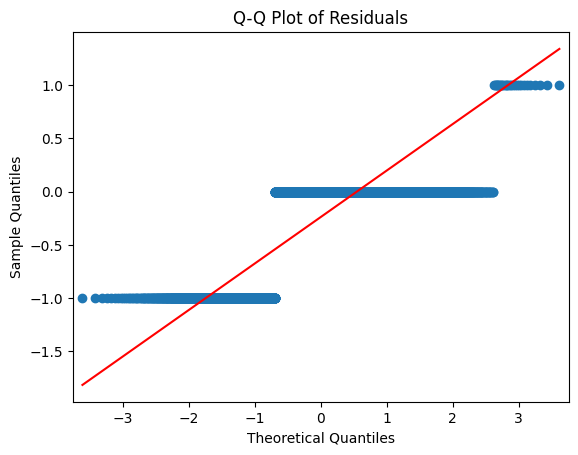

In [60]:
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Decision Tree

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


In [64]:
tree_clf = DecisionTreeClassifier(class_weight={0: 2, 1: 1},random_state=42)
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 2, 1: 1},
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [65]:
y_pre_tree = grid_search.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pre_tree)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pre_tree)
print("Confusion Matrix:\n", cm)
classification_report_tree = classification_report(y_test, y_pre_tree)
print(classification_report_tree)

Accuracy: 0.7658912431471329
Confusion Matrix:
 [[5049   11]
 [1569  120]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      5060
           1       0.92      0.07      0.13      1689

    accuracy                           0.77      6749
   macro avg       0.84      0.53      0.50      6749
weighted avg       0.80      0.77      0.68      6749



# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=None,          # Allow full growth unless overfitting is observed
    min_samples_split=2,     # Minimum samples to split an internal node
    random_state=42          # Ensures reproducibility
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

In [69]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
print(classification_report_rf)
# Display results
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(classification_report_rf)

              precision    recall  f1-score   support

           0       0.77      0.93      0.84      5060
           1       0.45      0.17      0.25      1689

    accuracy                           0.74      6749
   macro avg       0.61      0.55      0.55      6749
weighted avg       0.69      0.74      0.69      6749

Random Forest Model Performance:
Accuracy: 0.7395169654763669
Confusion Matrix:
[[4696  364]
 [1394  295]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      5060
           1       0.45      0.17      0.25      1689

    accuracy                           0.74      6749
   macro avg       0.61      0.55      0.55      6749
weighted avg       0.69      0.74      0.69      6749



# XG Boot




In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the model
gb_model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],    # Shrinks contribution of each tree
    'max_depth': [3, 5, 7],                 # Maximum depth of individual trees
    'subsample': [0.8, 0.9, 1.0]            # Fraction of samples used for fitting each base learner
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


In [98]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
best_gb_model = grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Confusion Matrix:
[[5050   10]
 [1569  120]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      5060
           1       0.92      0.07      0.13      1689

    accuracy                           0.77      6749
   macro avg       0.84      0.53      0.50      6749
weighted avg       0.80      0.77      0.68      6749

